In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install seaborn

In [2]:
from IPython.display import Latex, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, binom
import seaborn as sns

## testing subsequent A/B tests
We are simulating what happens when a/b testing (for example website version, or recommendation algorithm versions, etc) over a longer period, only implementing new variants when they are significantly outperforming the previous variant. We will show that reporting the winning variants 'uplifts' will be an overestimation of the improvement, due to the multiple comparison problem. Note that we want to show that this happens with subsequent testing, even if each test only has two variants.

In [3]:
def run_t_test(users_a, users_b, converted_a, converted_b):
    p_a_hat = converted_a / users_a
    p_b_hat = converted_b / users_b
    var_p_a_hat = p_a_hat * (1-p_a_hat)
    var_p_b_hat = p_b_hat * (1-p_b_hat)
    diff_hat = (p_b_hat - p_a_hat)
    t_stat = diff_hat / np.power((var_p_a_hat/users_a + 
                                  var_p_b_hat/users_b), 0.5)
    p_val = norm.cdf(t_stat)
    return diff_hat, p_val

def run_subsequent_tests(start_p, true_diffs, n_per_period, alpha):
    current_p = start_p
    users_a = users_b = int(round(n_per_period/2))
    winning_diff_hats = []
    diff_hats = []
    p_vals = []
    wins = 0
    for true_diff in true_diffs:
        test_p = max(current_p + true_diff, 0)
        converted_a = binom.rvs(users_a, current_p)
        converted_b = binom.rvs(users_b, test_p)
        diff_hat, p_val = run_t_test(users_a, 
                                     users_b, 
                                     converted_a, 
                                     converted_b)
        diff_hats += [diff_hat]
        p_vals += [p_val]
        if p_val >= 1-alpha/2:
            wins += 1
            winning_diff_hats += [diff_hat]
            current_p = test_p
    total_true_lift = current_p - start_p
    reported_lift = sum(winning_diff_hats)
    return total_true_lift, reported_lift, wins, diff_hats, p_vals

In [4]:
runs = 1000
start_p = 0.3
num_tests = 12
true_diffs_mean = 0.01
true_diffs_stdev = 0.05
n_per_period = 1000
alpha = 0.05

total_true_lifts = []
reported_lifts = []
num_wins = []

for r in range(runs):
    true_diffs = norm.rvs(loc=true_diffs_mean, 
                          scale=true_diffs_stdev, 
                          size=num_tests)
    total_true_lift, reported_lift, wins, diff_hats, p_vals \
            = run_subsequent_tests(start_p, 
                                 true_diffs, 
                                 n_per_period, 
                                 alpha)
    total_true_lifts += [total_true_lift]
    reported_lifts += [reported_lift]
    num_wins += [wins]

In [5]:
print('Mean True Lifts: {0:.2f}'.format(np.mean(total_true_lifts)))
print('Mean Reported Lifts: {0:.2f}'.format(np.mean(reported_lifts)))
print('Mean True Lifts: {0:.0f}%'.format(np.mean(total_true_lifts)/start_p*100))
print('Mean Reported Lifts: {0:.0f}%'.format(np.mean(reported_lifts)/start_p*100))

Mean True Lifts: 0.17
Mean Reported Lifts: 0.22
Mean True Lifts: 56%
Mean Reported Lifts: 74%


/home/rubenmak/PycharmProjects/datasciencemaster___assignments___shared/venv/multiple_comparison/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


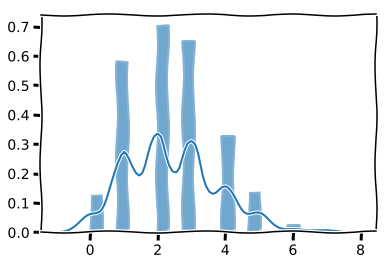

In [6]:
with plt.xkcd():
    sns.distplot(num_wins, label='num_wins')

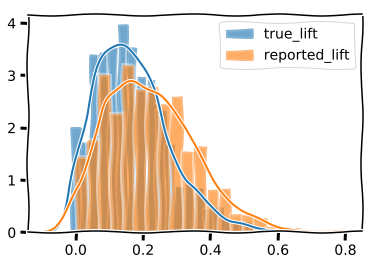

In [7]:
with plt.xkcd():
    sns.distplot(total_true_lifts, label='true_lift')
    sns.distplot(reported_lifts, label='reported_lift')
    plt.legend()
    plt.show()

In [8]:
!jupyter nbconvert multiple_comparison_problem_in_subsequent_ab_tests.ipynb --to slides --post serve

[NbConvertApp] Converting notebook multiple_comparison_problem_in_subsequent_ab_tests.ipynb to slides
[NbConvertApp] Writing 386897 bytes to multiple_comparison_problem_in_subsequent_ab_tests.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/multiple_comparison_problem_in_subsequent_ab_tests.slides.html
Use Control-C to stop this server
Opening in existing browser session.
^C

Interrupted
